### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot

### Import dataset

In [5]:
parliament = pd.read_csv("merged_coalition.csv")
parliament.head()

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,Victor ABENS,1802,Luxembourg,Socialist Group,NaN,Parti ouvrier socialiste luxembourgeois,1979-1984,07-1979,male,centre-left
1,Gordon J. ADAM,1427,United Kingdom,Socialist Group,NaN,Labour Party,1979-1984,07-1979,male,centre-left
2,Pietro ADONNINO,957,Italy,European People's Party,NaN,Democrazia cristiana,1979-1984,07-1979,male,centre-right
3,Jochen van AERSSEN,1797,Germany,European People's Party,NaN,Christlich Demokratische Union Deutschlands,1979-1984,07-1979,male,centre-right
4,Susanna AGNELLI,943,Italy,Liberal and Democratic Group,NaN,Partito repubblicano italiano,1979-1984,07-1979,female,centre


In [3]:
# we are interested in analyzing whether some deputies have been reelected during the last three terms more than once
# so, first we create one dataset per term 
term7 = parliament[parliament["term"]== "2009-2014"]
term8 = parliament[parliament["term"]== "2014-2019"]
term9 = parliament[parliament["term"]== "2019-2024"]

# there could be deputies that participated in all three terms, or only in two of them, so we make all
# kind of merges for future analysis
merged789 = pd.concat([term7, term8, term9])
merged78 = pd.concat([term7,term8])
merged79 = pd.concat([term7,term9])
merged89 = pd.concat([term8,term9])

### Network of deputies

In [8]:
# we decided to visualize a network
# we will create one node for each term, that will be connected to all deputies of that term 
# in this way deputies that have been in more than one term will have as many edges as the number
# of terms they participated to

# first we have to create the dataframes that we will use to build the network
# for term 7 for example we will have a node 'term7' linked to all the deputies of term7 by their fullName
dati7 = {'source': 'term7', 'target': [*term7['fullName'].tolist()]}
df1 = pd.DataFrame(dati7, columns=['source','target'])

dati8 = {'source': 'term8', 'target': [*term8['fullName'].tolist()]}
df2 = pd.DataFrame(dati8, columns=['source','target'])

dati9 = {'source': 'term9', 'target': [*term9['fullName'].tolist()]}
df3 = pd.DataFrame(dati9, columns=['source','target'])

In [9]:
# we do all the possible merges for our future analysis
result = pd.concat([df1, df2, df3])
result78 = pd.concat([df1, df2])
result79 = pd.concat([df1, df3])
result89 = pd.concat([df2, df3])

In [10]:
# Let's check if some deputies have been elected for more than one term
# among the last three
# we do it by checking if in the column 'target' of the created dataframe 'result' there is any duplicate
result['target'].duplicated().any()

True

In [11]:
# Let's create a graph from the Pandas DataFrame 'result' containing our edge list
g = nx.from_pandas_edgelist(result, source='source', target='target')

In [12]:
# we build a color map because we want to colore each node in the graph according to the number of terms it is linked to
# moreover we color the central nodes indicating the term in black

color_map = []
nodes = list(g.nodes)
terms = ['term7', 'term8', 'term9']
nodes = list(g.nodes)
for node in g:
    if node in terms:
        color_map.append('black')
    elif sum(result[result['target'] == node].value_counts()) == 3:
        color_map.append('red')
    elif sum(result[result['target'] == node].value_counts()) == 2: 
        color_map.append('green')
    else:
        color_map.append('blue')
        
color_map

['black',
 'blue',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'green',
 'blue',
 'green',
 'green',
 'green',
 'blue',
 'green',
 'green',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'red',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'green',
 'blue',
 'green',
 'green',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'red',
 'blue',
 'blue',
 'red',
 'blu

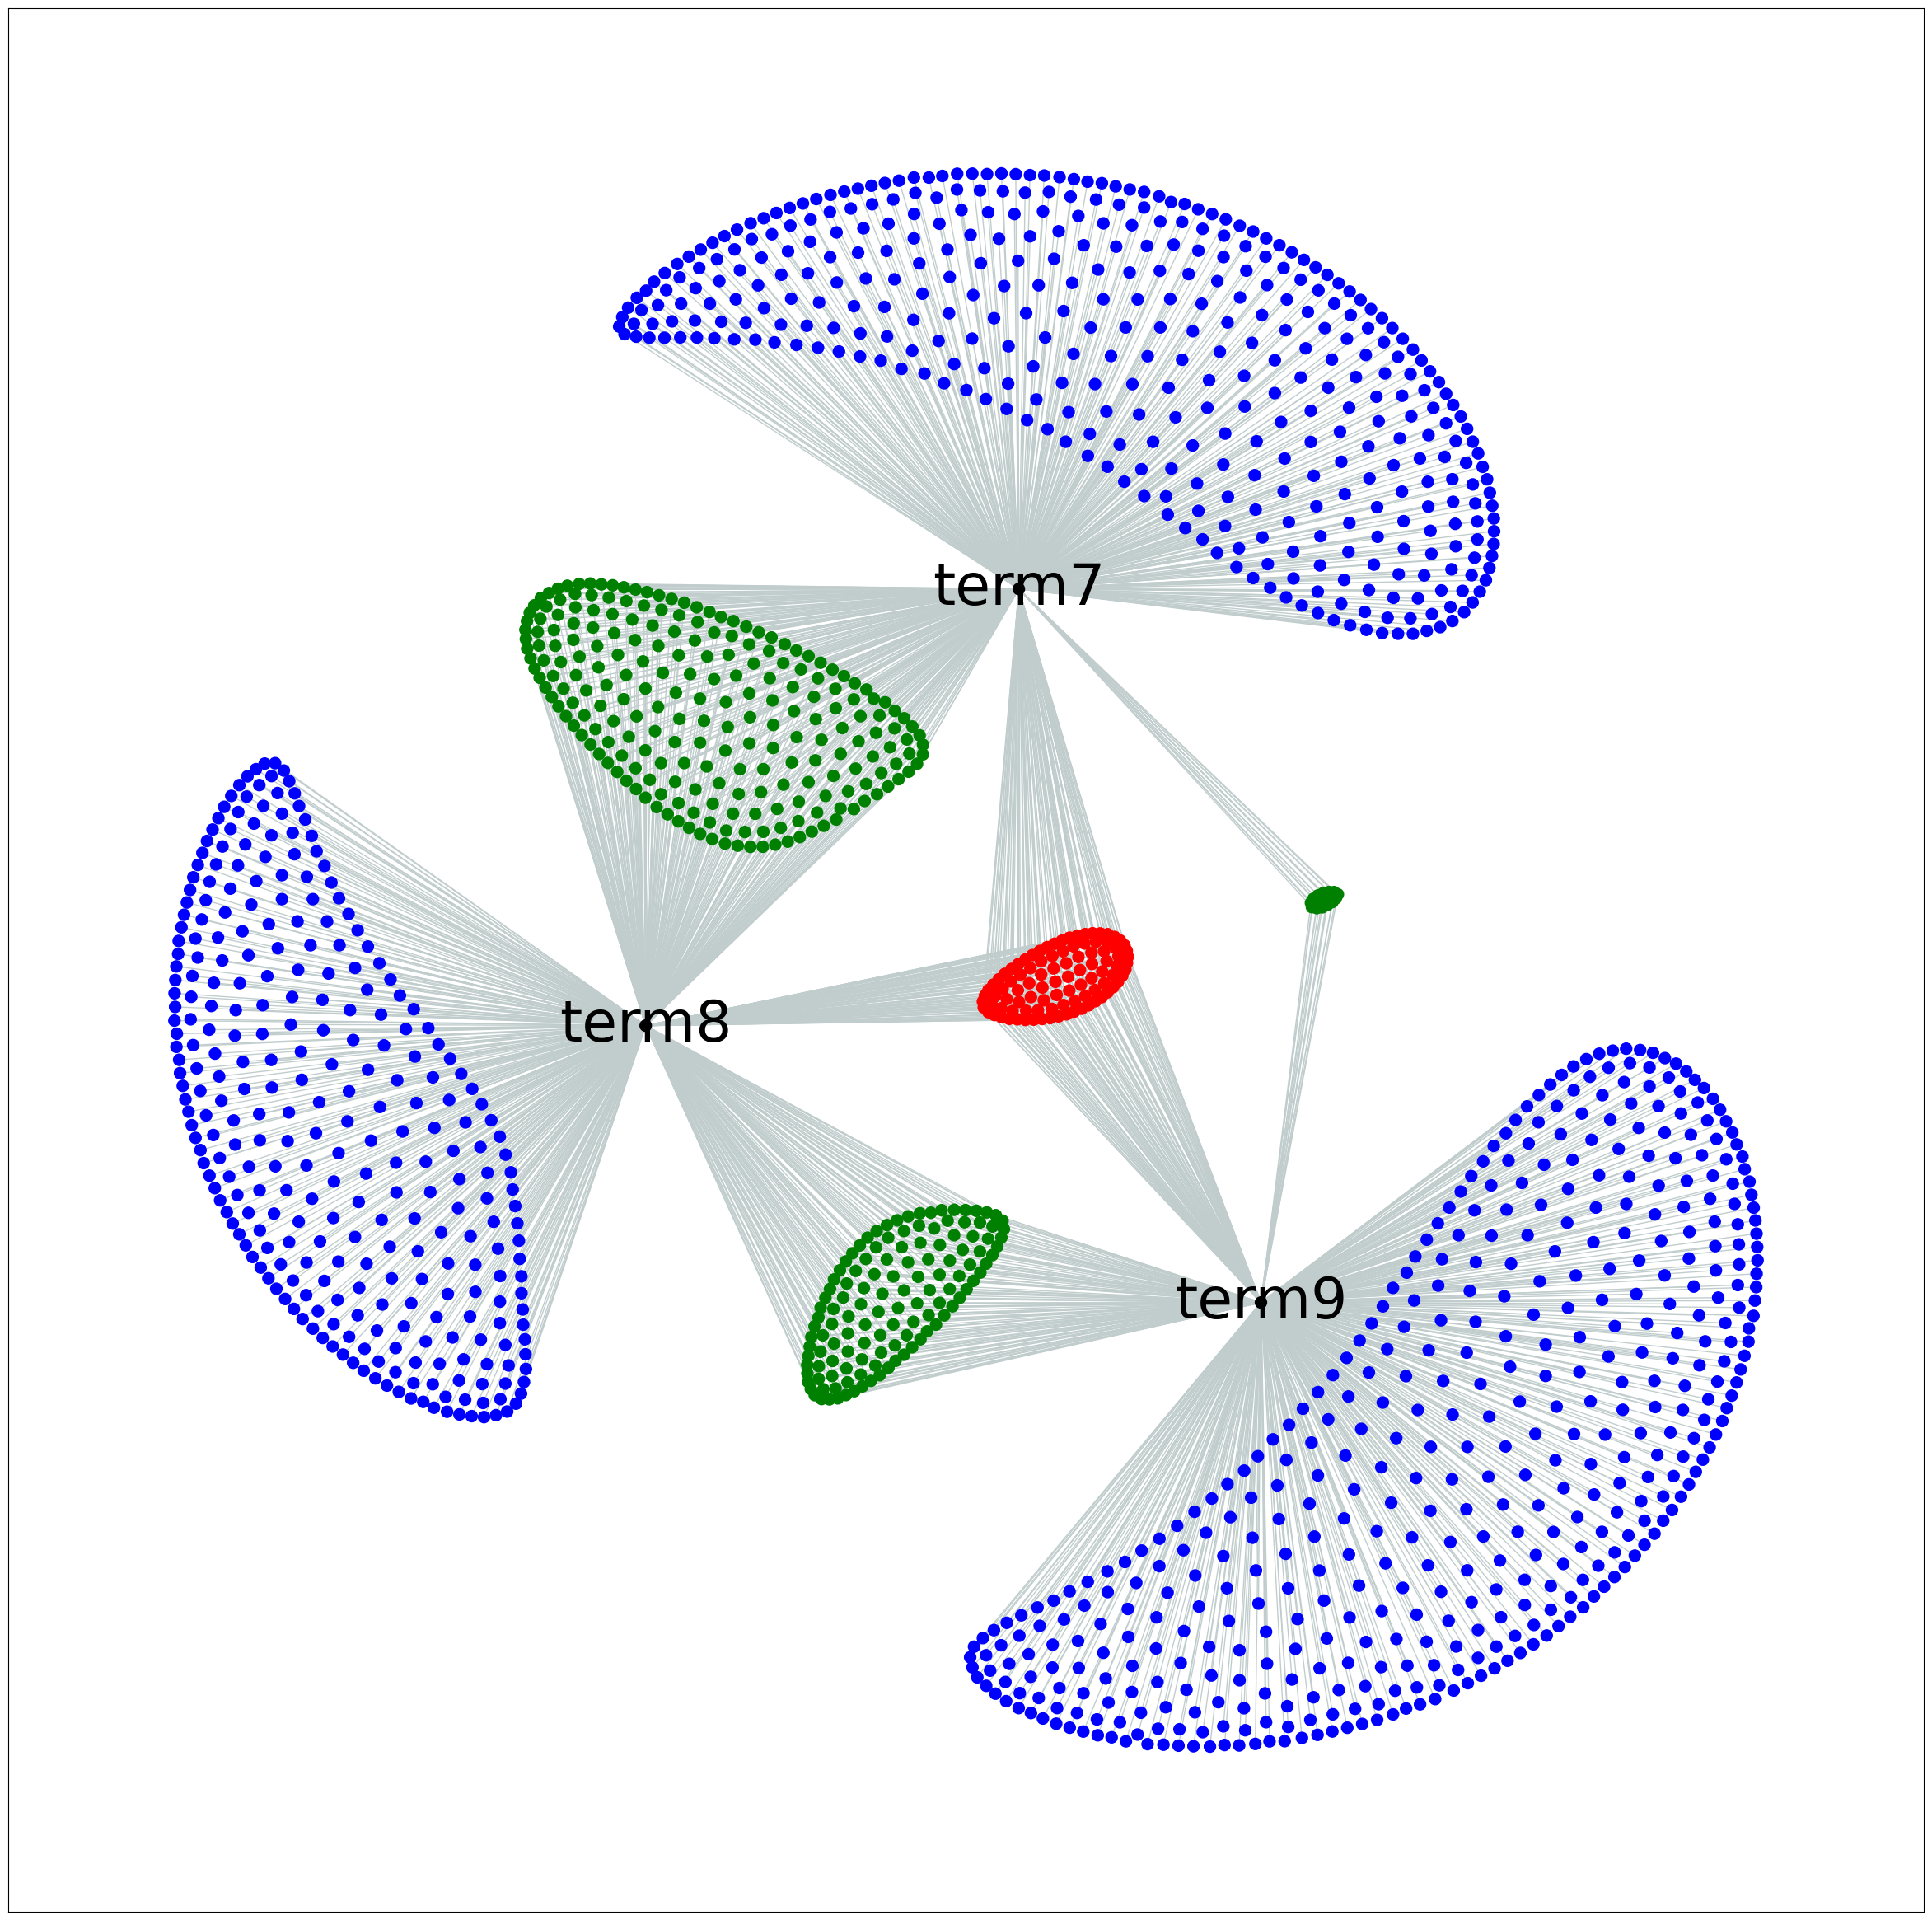

In [13]:
# we set the edge color to be lightgray and the node size, since we have a lot of nodes, to be 100 (smaller than the default one)
# the best layout for our case is kamada kawai
# the only labels that we want to display are the ones indicating the term

options = {
    'edge_color': '#C1CDCD',
    'node_size': 100
}

fig = plt.figure(1, figsize=(30, 30))

nx.draw_networkx(g,with_labels= False, **options, pos = nx.kamada_kawai_layout(g), node_color=color_map)

nx.draw_networkx_edges(g, pos = nx.kamada_kawai_layout(g), alpha = 0.5, width = 0.0001)

labels = {} 
x = ['term7', 'term8', 'term9']
for i in range(0,len(x)):
    for node in g.nodes():
        if node == x[i]:
        #set the node name as the key and the label as its value 
            labels[node] = node
nx.draw_networkx_labels(g,nx.kamada_kawai_layout(g),labels,font_size=50,font_color='#000000')

plt.savefig("Graph.png", format="PNG")


### Deputies elected three times

In [14]:
# we want to focus on the deputies that have been elected in all three terms (the nodes colored in red)
# so we create a dataset with all deputies that have been elected for all three terms
three_terms = pd.DataFrame(columns = merged789.columns)

for node in g:
    if sum(result[result['target'] == node].value_counts()) == 3:
        three_terms = pd.concat([three_terms, merged789[merged789['fullName'] == node]], ignore_index=True)

three_terms.to_csv('dash/dataset/last3terms.csv')  
three_terms

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2009-2014,07-2009,female,centre-left
1,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2014-2019,07-2014,female,centre-left
2,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2019-2024,07-2019,female,centre-left
3,Monika BEŇOVÁ,23868,Slovakia,Group of the Progressive Alliance of Socialist...,NaN,SMER-Sociálna demokracia,2009-2014,07-2009,female,centre-left
4,Monika BEŇOVÁ,23868,Slovakia,Group of the Progressive Alliance of Socialist...,NaN,SMER-Sociálna demokracia,2014-2019,07-2014,female,centre-left
...,...,...,...,...,...,...,...,...,...,...
289,Marian-Jean MARINESCU,33982,Romania,European People's Party,NaN,Partidul Democrat-Liberal,2014-2019,07-2014,male,centre-right
290,Marian-Jean MARINESCU,33982,Romania,European People's Party,NaN,Partidul Naţional Liberal,2019-2024,07-2019,male,centre-right
291,Evžen TOŠENOVSKÝ,96713,Czechia,European Conservatives and Reformists Group,NaN,Občanská demokratická strana,2009-2014,07-2009,male,right
292,Evžen TOŠENOVSKÝ,96713,Czechia,European Conservatives and Reformists Group,NaN,Občanská demokratická strana,2014-2019,07-2014,male,right


#### Let's investigate the composition of these deputies.
#### What is their gender? What is their political orientation? 

##### To do so we realized a stacked bar chart with plotly express, where:
##### - x axis: political orientation
##### - y axis: percentage
##### - color: gender
##### In this way, for each term and for each political orientation we can see the percentage of male and female deputies that stayed, over the total of deputies for that political orientation in that term

##### By changing the term, since these plots are all referred to the same group of deputies, we can see if and how they have changed poitical orientation.

In [17]:
def create_bar_chart(term):
    filtered_df = three_terms[three_terms['term'] == term]
    grouped = filtered_df.groupby(['orientation', 'gender']).size().reset_index(name='count')
    term = parliament[parliament["term"]== term]
    tot_orient = {}
    for el in term["orientation"].unique():
        for index, row in term.iterrows():
            if row['orientation'] == el:
                if el not in tot_orient:
                    tot_orient[el] = 1
                else:
                    tot_orient[el] += 1

    grouped = grouped.assign(tot_term_orient = 0)

    for index, row in grouped.iterrows():
        tot = tot_orient[row['orientation']]
        row['tot_term_orient']=tot
        grouped.loc[index, :] = row

    # Calculate the 'tot' column and merge it back to the original DataFrame
    tot_values = grouped.groupby('orientation')['count'].sum().reset_index(name='tot')
    grouped = grouped.merge(tot_values, on='orientation', how='left')

    # Calculate the percentages
    grouped['percentage'] = grouped['count'] / grouped['tot_term_orient'] * 100
    
    # Create a pivot table for plotting the stacked bar chart
    pivot_table = grouped.pivot_table(index='orientation', columns='gender', values='percentage', fill_value=0)

    # Melt the pivot table to long format for Plotly Express plotting
    melted_pivot_table = pivot_table.reset_index().melt(id_vars='orientation', var_name='gender', value_name='percentage')

    # Plot the stacked bar chart using Plotly Express
    fig = px.bar(melted_pivot_table, x='orientation', y='percentage', color='gender', text='percentage',
                 labels={'orientation': 'Orientation', 'percentage': 'Percentage', 'gender': 'Gender'},
                 category_orders={'gender': sorted(melted_pivot_table['gender'].unique())}, color_discrete_sequence=['#FF9DA6', '#72B7B2'])

    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.update_layout(showlegend=True, legend_title_text='Gender')
    fig.update_xaxes(categoryorder='array', categoryarray= ['left', 'centre-left', 'centre', 'centre-right', 'right', 'Non aligned'])
    return fig

# This is for example the plot of term 9
fig = create_bar_chart('2019-2024')
plot(fig)

'temp-plot.html'

### Pie charts e bar charts

#### We have also realized the following visualization focusing on the gender composition only and on the home country of deputies, but we decided to not add them to our dashboard because they were not particularly informative and where not really useful for our analysis

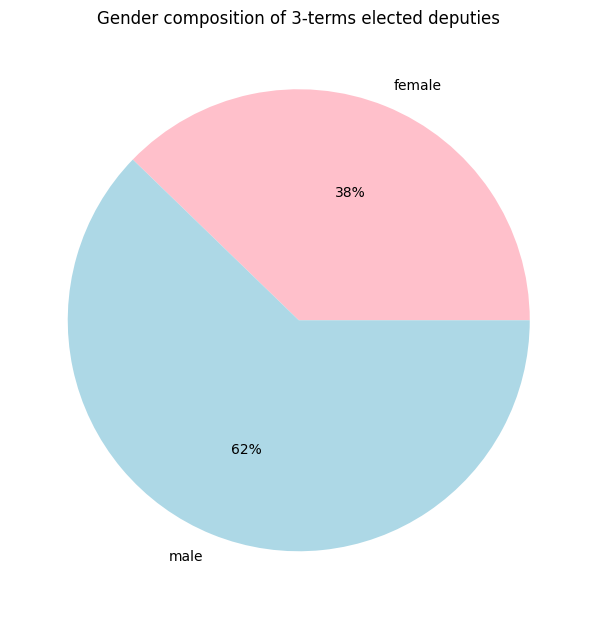

In [18]:
df_plt1 = three_terms.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt1['Count'], labels = df_plt1.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of 3-terms elected deputies')
plt.savefig("gender1.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

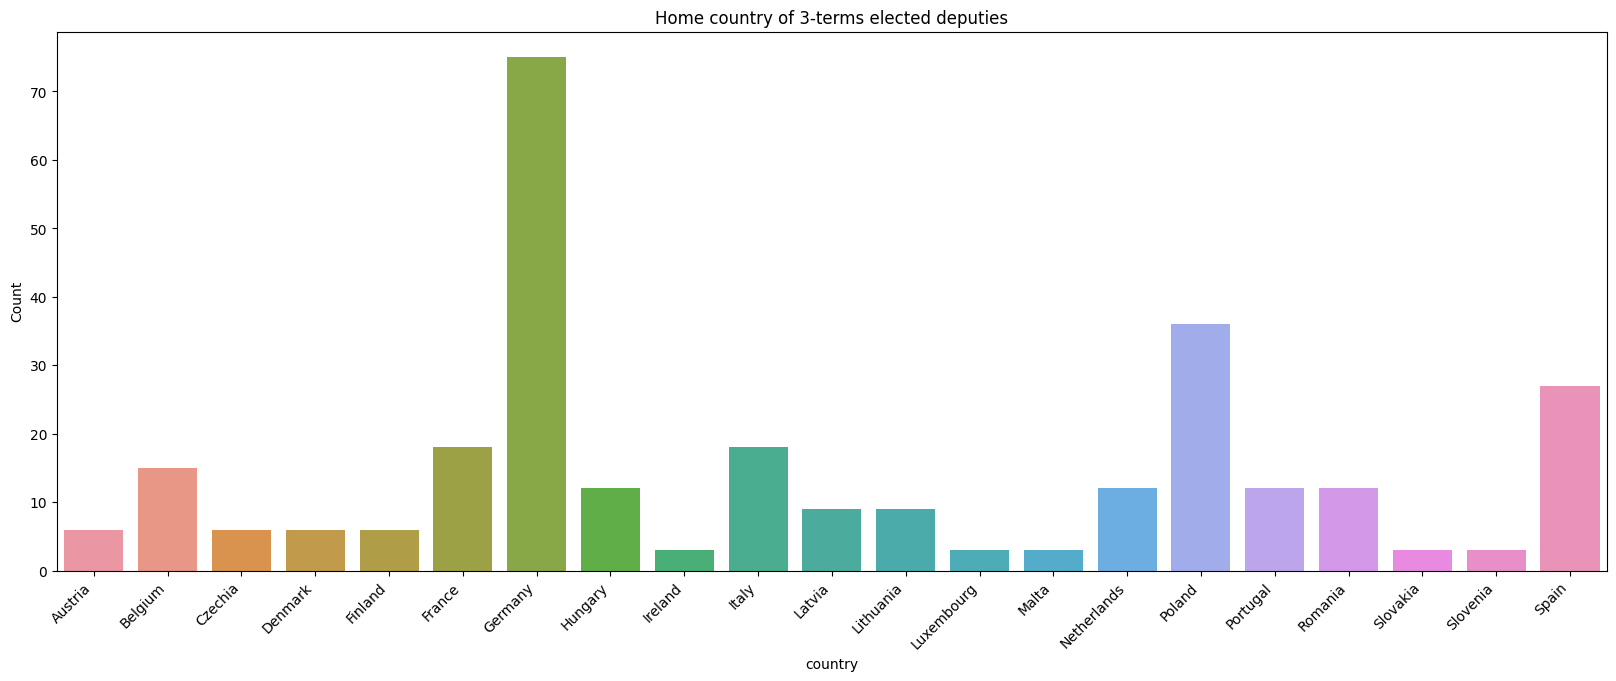

In [19]:
df_plt1 = three_terms.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c = sns.barplot(x = df_plt1.index, y = 'Count', data = df_plt1)
c.set(title='Home country of 3-terms elected deputies')
c.set_xticklabels(c.get_xticklabels(), rotation=45, horizontalalignment='right')
c.set_ylabel('Count')

#### Initially, we did them also for deputies that have been elected for two terms only

In [20]:
# create a dataset with all deputies that have been elected for terms 7 and 8
terms_78 = pd.DataFrame(columns = merged78.columns)

for node in g:
    if sum(result78[result78['target'] == node].value_counts()) == 2:
        terms_78 = pd.concat([terms_78, merged78[merged78['fullName'] == node]], ignore_index=True)

        terms_78 = terms_78.drop_duplicates(subset=['fullName'])
terms_78

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,John Stuart AGNEW,96897,United Kingdom,Europe of freedom and democracy Group,NaN,United Kingdom Independence Party,2009-2014,07-2009,male,right
1,Jan Philipp ALBRECHT,96736,Germany,Group of the Greens/European Free Alliance,NaN,Bündnis 90/Die Grünen,2009-2014,07-2009,male,centre-left
2,Richard ASHWORTH,28132,United Kingdom,European Conservatives and Reformists Group,NaN,Conservative Party,2009-2014,07-2009,male,right
3,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2009-2014,07-2009,female,centre-left
4,Inés AYALA SENDER,28292,Spain,Group of the Progressive Alliance of Socialist...,NaN,Partido Socialista Obrero Español,2009-2014,07-2009,female,centre-left
...,...,...,...,...,...,...,...,...,...,...
321,Nirj DEVA,4556,United Kingdom,European Conservatives and Reformists Group,NaN,Conservative Party,2009-2014,07-2009,male,right
322,Gerben-Jan GERBRANDY,96940,Netherlands,Group of the Alliance of Liberals and Democrat...,NaN,Democraten 66,2009-2014,07-2009,male,centre
323,Dieter-Lebrecht KOCH,1852,Germany,European People's Party,NaN,Christlich Demokratische Union Deutschlands,2009-2014,07-2009,male,centre-right
324,Marian-Jean MARINESCU,33982,Romania,European People's Party,NaN,Partidul Democrat-Liberal,2009-2014,07-2009,male,centre-right


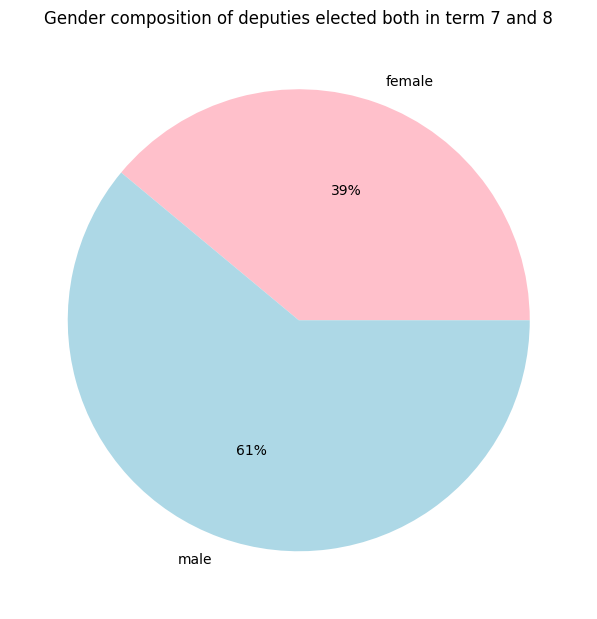

In [21]:
df_plt2 = terms_78.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt2['Count'], labels = df_plt2.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of deputies elected both in term 7 and 8')
plt.savefig("gender2.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

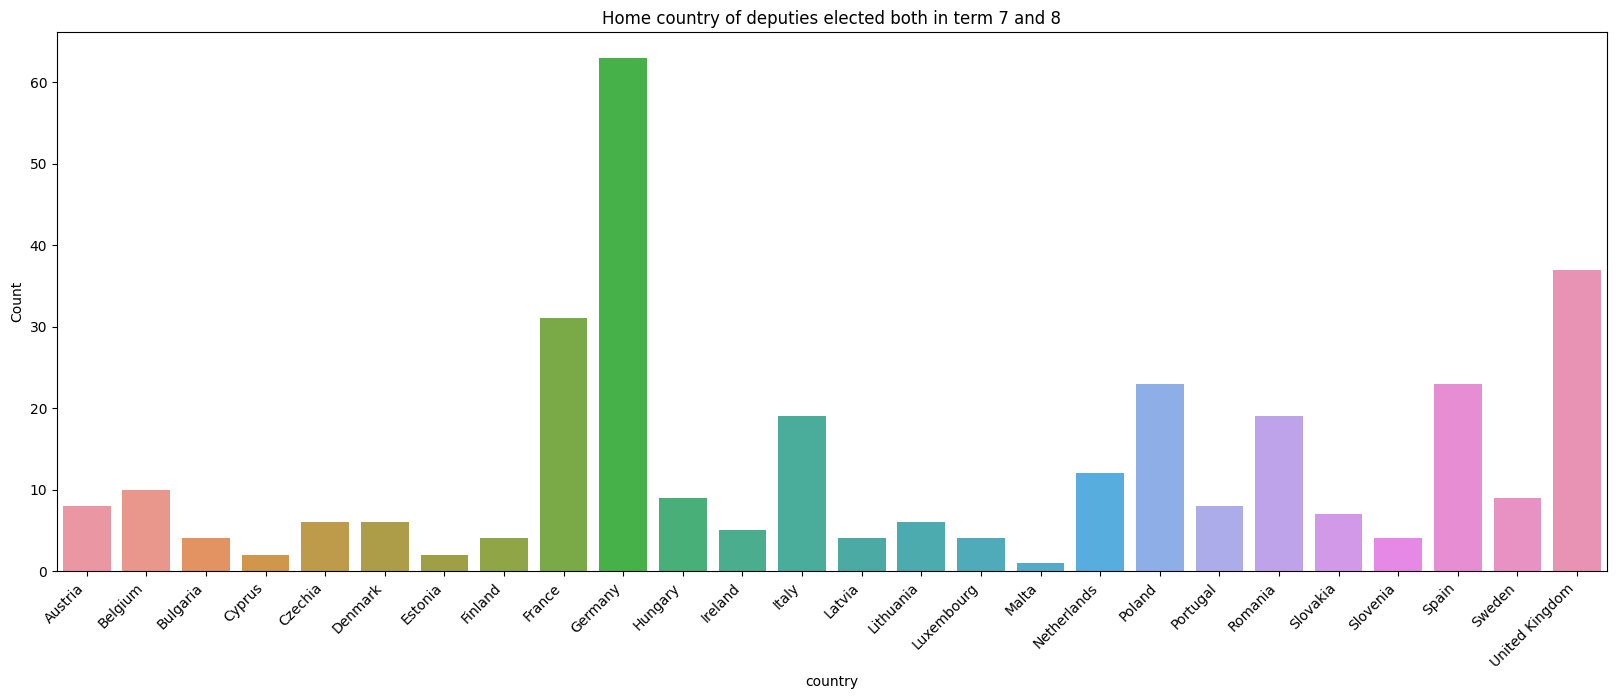

In [22]:
df_plt2 = terms_78.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c1 = sns.barplot(x = df_plt2.index, y = 'Count', data = df_plt2)
c1.set(title='Home country of deputies elected both in term 7 and 8')
c1.set_xticklabels(c1.get_xticklabels(), rotation=45, horizontalalignment='right')
c1.set_ylabel('Count')

In [23]:
# create a dataset with all deputies that have been elected for term 7 and 9
terms_79 = pd.DataFrame(columns = merged79.columns)

for node in g:
    if sum(result79[result79['target'] == node].value_counts()) == 2:
        terms_79 = pd.concat([terms_79, merged79[merged79['fullName'] == node]], ignore_index=True)
terms_79 = terms_79.drop_duplicates(subset=['fullName'])
terms_79

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,François ALFONSI,96750,France,Group of the Greens/European Free Alliance,NaN,Partitu di a Nazione Corsa,2009-2014,07-2009,male,centre-left
2,Pablo ARIAS ECHEVERRÍA,96808,Spain,European People's Party,NaN,Partido Popular,2009-2014,07-2009,male,centre-right
4,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2009-2014,07-2009,female,centre-left
6,Monika BEŇOVÁ,23868,Slovakia,Group of the Progressive Alliance of Socialist...,NaN,SMER-Sociálna demokracia,2009-2014,07-2009,female,centre-left
8,Sergio BERLATO,4746,Italy,European People's Party,NaN,Il Popolo della Libertà,2009-2014,07-2009,male,centre-right
...,...,...,...,...,...,...,...,...,...,...
216,Tatjana ŽDANOKA,28619,Latvia,Group of the Greens/European Free Alliance,NaN,Par cilvēka tiesībām vienotā Latvijā,2009-2014,07-2009,female,centre-left
218,Roberts ZĪLE,28615,Latvia,European Conservatives and Reformists Group,NaN,Tēvzemei un Brīvībai/LNNK,2009-2014,07-2009,male,right
220,Milan ZVER,96933,Slovenia,European People's Party,NaN,Slovenska demokratska stranka,2009-2014,07-2009,male,centre-right
222,Marian-Jean MARINESCU,33982,Romania,European People's Party,NaN,Partidul Democrat-Liberal,2009-2014,07-2009,male,centre-right


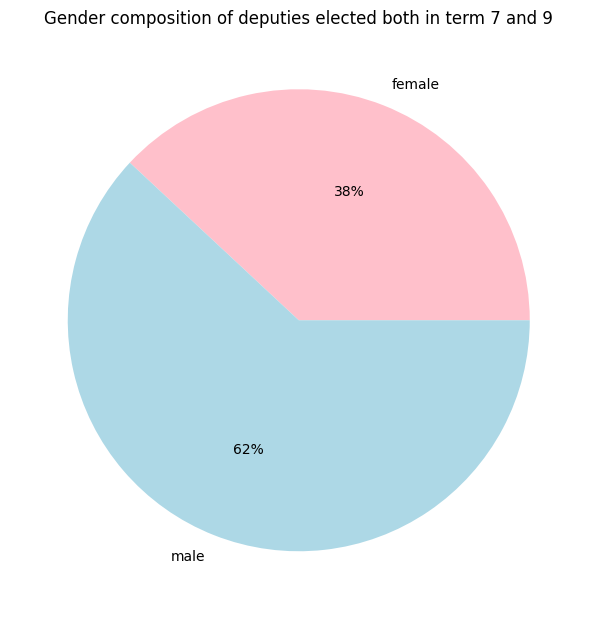

In [24]:
df_plt3 = terms_79.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt3['Count'], labels = df_plt3.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of deputies elected both in term 7 and 9')
plt.savefig("gender3.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

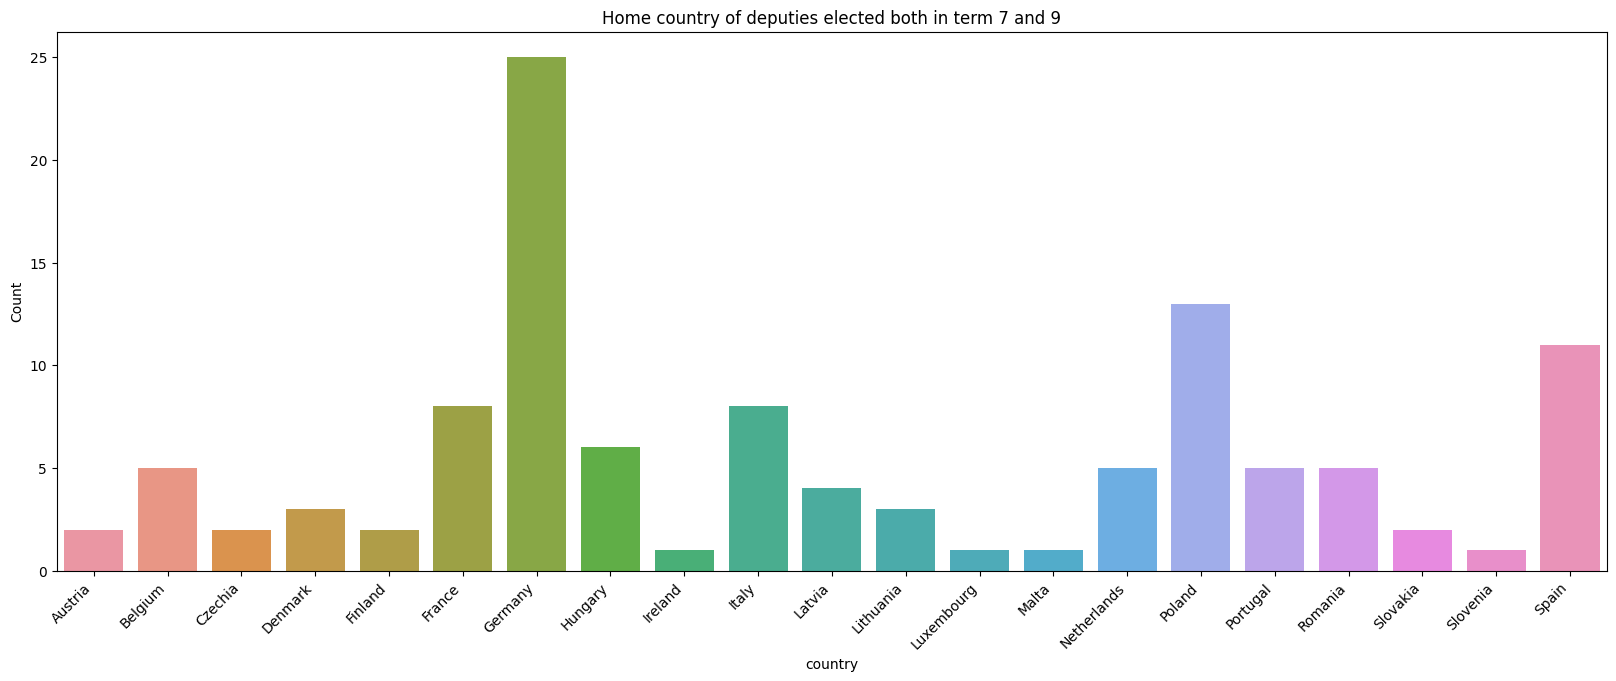

In [25]:
df_plt3 = terms_79.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c2 = sns.barplot(x = df_plt3.index, y = 'Count', data = df_plt3)
c2.set(title='Home country of deputies elected both in term 7 and 9')
c2.set_xticklabels(c2.get_xticklabels(), rotation=45, horizontalalignment='right')
c2.set_ylabel('Count')

In [26]:
# create a dataset with all deputies that have been elected for term 8 and 9
terms_89 = pd.DataFrame(columns = merged89.columns)

for node in g:
    if sum(result89[result89['target'] == node].value_counts()) == 2:
        terms_89 = pd.concat([terms_89, merged89[merged89['fullName'] == node]], ignore_index=True)

        terms_89 = terms_89.drop_duplicates(subset=['fullName'])
terms_89

,fullName,id,country,eu_group_1,eu_group_2,nation_group,term,start_period_1,gender,orientation
0,Margrete AUKEN,28161,Denmark,Group of the Greens/European Free Alliance,NaN,Socialistisk Folkeparti,2014-2019,07-2014,female,centre-left
1,Monika BEŇOVÁ,23868,Slovakia,Group of the Progressive Alliance of Socialist...,NaN,SMER-Sociálna demokracia,2014-2019,07-2014,female,centre-left
2,Izaskun BILBAO BARANDICA,96922,Spain,Group of the Alliance of Liberals and Democrat...,NaN,Partido Nacionalista Vasco,2014-2019,07-2014,female,centre
3,Vilija BLINKEVIČIŪTĖ,96681,Lithuania,Group of the Progressive Alliance of Socialist...,NaN,Lietuvos socialdemokratų partija,2014-2019,07-2014,female,centre-left
4,Udo BULLMANN,4267,Germany,Group of the Progressive Alliance of Socialist...,NaN,Sozialdemokratische Partei Deutschlands,2014-2019,07-2014,male,centre-left
...,...,...,...,...,...,...,...,...,...,...
220,Marco ZANNI,124780,Italy,Europe of Freedom and Direct Democracy Group,Non-attached Members,Movimento 5 Stelle,2014-2019,07-2014,male,right
221,Tomáš ZDECHOVSKÝ,124713,Czechia,European People's Party,NaN,Křesťanská a demokratická unie - Československ...,2014-2019,07-2014,male,centre-right
222,Kosma ZŁOTOWSKI,124884,Poland,European Conservatives and Reformists Group,NaN,Prawo i Sprawiedliwość,2014-2019,07-2014,male,right
223,Carlos ZORRINHO,124739,Portugal,Group of the Progressive Alliance of Socialist...,NaN,Partido Socialista,2014-2019,07-2014,male,centre-left


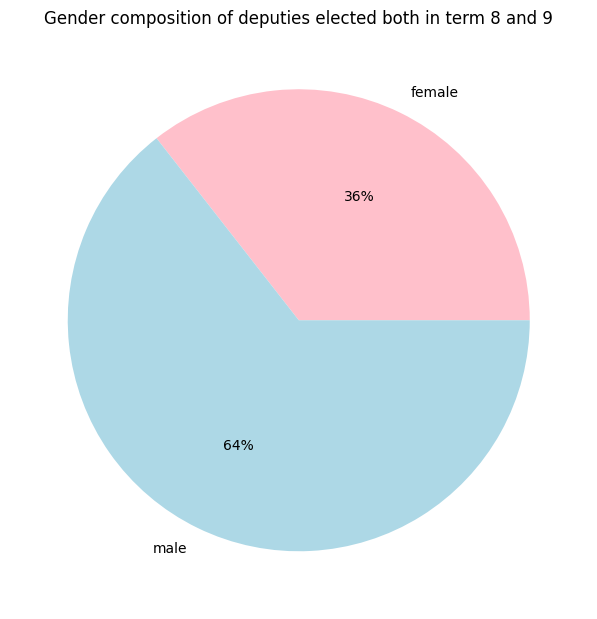

In [27]:
df_plt4 = terms_89.groupby('gender').size().to_frame('Count')
color = ['pink','lightblue']
pie, ax = plt.subplots(figsize=(7.5, 7.5))
plt.pie(df_plt4['Count'], labels = df_plt4.index, colors = color, autopct='%.0f%%')
plt.title('Gender composition of deputies elected both in term 8 and 9')
plt.savefig("gender4.png", format="PNG")
plt.show()

Text(0, 0.5, 'Count')

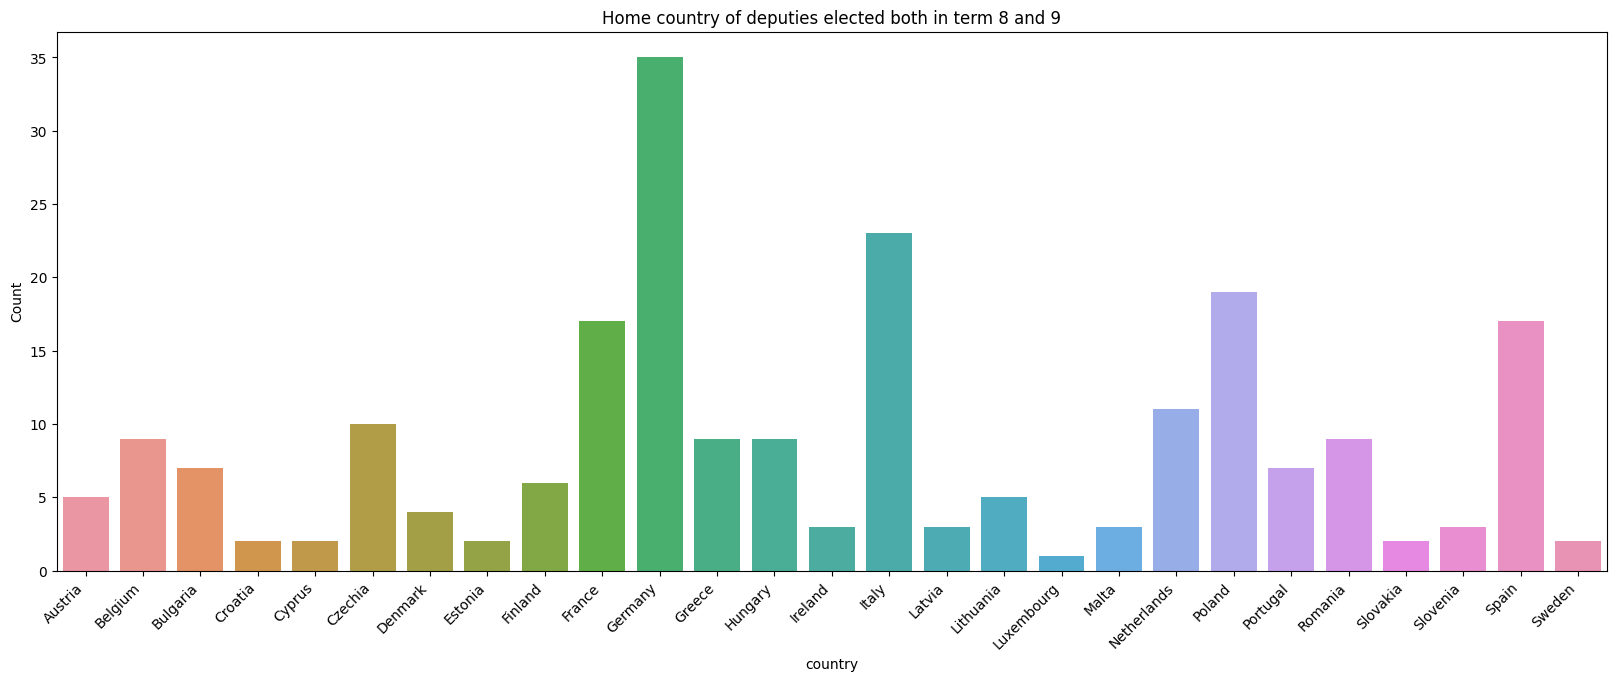

In [28]:
df_plt4 = terms_89.groupby('country').size().to_frame('Count')
pie, ax = plt.subplots(figsize=(20, 7))
c3 = sns.barplot(x = df_plt4.index, y = 'Count', data = df_plt4)
c3.set(title='Home country of deputies elected both in term 8 and 9')
c3.set_xticklabels(c3.get_xticklabels(), rotation=45, horizontalalignment='right')
c3.set_ylabel('Count')